# Traceroute and Ping Web latency Analysis

In [112]:
import pandas as pd
import matplotlib.pyplot as plt

We chose to analyse www.youtube.com, www.appstate.edu, www.ox.au.uk. Respectively that is Youtube, Applilachian State University, and Oxford University. Out favorite site, an American educational institution, and a European educational institution.

We ran a ping trial (60 pings) to all the routers on the path to our remote host 2 times during 5 different time periods (and 3 times during the 5th time period). We will use the following encoding to indicate which time period each ping was run in:

- 1 -> 7am-9am (07:00-09:00)       
     - EARLY MORNING
- 2 -> 10am-12pm (07:00-09:00)     
     - MID-MORNING
- 3 -> 2pm-5pm (14:00-16:00)       
     - MID-AFTERNOON
- 4 -> 6pm-8pm (18:00-20:00)      
    - EVENING
- 5 -> 10pm-6am (22:00-06:00)      
    - NIGHT

# Appalachian State University
- First we load in all of the relavent data, the dataframe are names using the convention:
institution_timePeriod_itteration

In [113]:
app_5_1 = pd.read_csv("appstate.edu_2021-03-16 00_01_25.567445_5.csv")
app_5_2 = pd.read_csv("appstate.edu_2021-03-16 00_02_25.388229_5.csv")
app_5_3 = pd.read_csv("appstate.edu_2021-03-16 00_16_25.270261_5.csv")

app_1_1 = pd.read_csv("appstate.edu_2021-03-16 08_01_25.621040_1.csv")
app_1_2 = pd.read_csv("appstate.edu_2021-03-16 08_16_26.505912_1.csv")

app_2_1 = pd.read_csv("appstate.edu_2021-03-16 11_01_26.157642_2.csv")
app_2_2 = pd.read_csv("appstate.edu_2021-03-16 11_16_25.132895_2.csv")

app_3_1 = pd.read_csv("appstate.edu_2021-03-16 14_31_25.888365_3.csv")
app_3_2 = pd.read_csv("appstate.edu_2021-03-16 14_46_25.966599_3.csv")

app_4_1 = pd.read_csv("appstate.edu_2021-03-16 19_01_26.019037_4.csv")
app_4_2 = pd.read_csv("appstate.edu_2021-03-16 19_16_25.406769_4.csv")

app = [app_5_1, app_5_2, app_5_3, 
       app_4_1, app_4_2,
      app_3_1, app_3_2,
      app_2_1, app_2_2,
      app_1_1, app_1_2]

All of the ping trial information can be viewed by printing out the contents of each dataframe.
#### Interesting note: for App state each ping trial went thru the exact same sequence of routers every single time

In [114]:
for i in app:
    print(i)

              ip  received    min     avg      max    mdev
0   152.19.160.1        60  0.670   0.831    1.012   0.064
1  152.19.253.53        60  0.773   3.344   64.420   9.165
2  152.19.253.89        60  1.252   2.418   27.996   4.514
3   152.2.255.65        60  1.346   1.589    1.977   0.136
4   128.109.1.89        60  4.768   5.166    5.692   0.196
5    128.109.5.2        60  8.459  15.620  281.757  35.928
6    152.10.0.71        60  8.615   8.772    9.356   0.109
              ip  received    min    avg     max    mdev
0   152.19.160.1        60  0.725  0.832   0.976   0.053
1  152.19.253.53        60  0.766  6.512  53.812  12.958
2  152.19.253.89        60  1.288  2.487  24.490   4.166
3   152.2.255.65        60  1.236  1.512   2.458   0.169
4   128.109.1.89        60  4.835  5.145   5.520   0.173
5    128.109.5.2        60  8.473  9.993  42.766   5.469
6    152.10.0.71        60  8.602  8.773  10.093   0.186
              ip  received    min     avg     max    mdev
0   152.19.160

### Each colored line represent a separate ping trial - first analysis compares different router performances
#### (each time period has 2 ping trial, night period has 3 ping trials)
- Below we do some general observations before delving into the variation in delays over the course of different time periods


Text(0, 0.5, 'Average Delay (ms)')

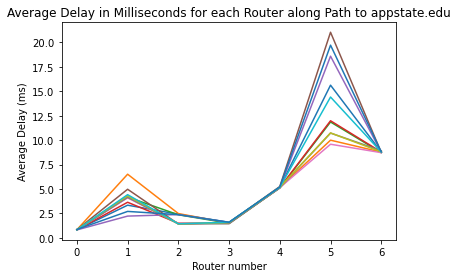

In [115]:
for i in app:
    plt.plot(list(range(i['avg'].shape[0])), i['avg'])
    
plt.title("Average Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Average Delay (ms)")

### Observations from the above graph:
#### Average Delay in Milliseconds for each Router along Path to appstate.edu
- At All 6 time points the average delay to get to the 0th, 3rd, 4th and 6th router is the same
- The routers with the most variation in average delay based on time is router #1 and #5
- Router #2, experiences some variation in average delay

#### Conclusion: 
- router 1 and 5 must be handling different amount of traffic at different times of the day, while 0,3,4,6 handle more consistant amount of traffic during the day

#### Interesting notes:
- each colored line represents a ping trial done at a specific time of the day (we will later show analysis based on time of day). 
    - Upon quick inspection, notice the purple line at router 1 and router 5. At router 1 there was the least delay and at router 5 it was the third highest delay. 
    - Now notice, the orange line, at route 1 it has the highest delay, and router 5 it has the second lowest delay. 
    - It is interesting to note that the average delays of router 1 and 5 seem to vary inversly with one another

Text(0, 0.5, 'Minimum Delay (ms)')

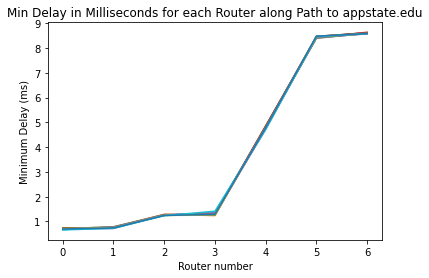

In [116]:
for i in app:
    plt.plot(list(range(i['min'].shape[0])), i['min'])
    
plt.title("Min Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Minimum Delay (ms)")

### Observations from the above graph:
#### Min Delay in Milliseconds for each Router along Path to appstate.edu
- At All 6 routers the minimum delay stayed pretty much the same during all 5 time periods
- there is a steap increase in delay from router 3 to 4 

##### conclusion: 
- min delay must be close to each router's peak performance
- the increase in delay from router 3 to 4 could be due to a jump in physical distance of the routers or just the difference minimum load that both routers tend to have

Text(0, 0.5, 'Maximum Delay (ms)')

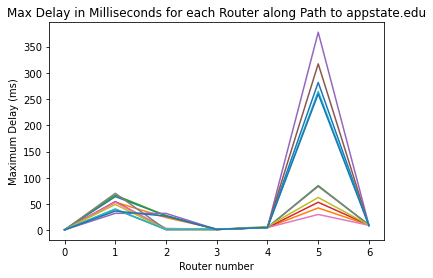

In [117]:
for i in app:
    plt.plot(list(range(i['max'].shape[0])), i['max'])
    
plt.title("Max Delay in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Maximum Delay (ms)")

### Observations from the above graph:
#### Max Delay in Milliseconds for each Router along Path to appstate.edu
- At router 1 and 5 there seems to be the most variation in maximum delay

##### conclusion: 
- peak traffic must vary hugely at those two routers (1 and 5) throught the day

Text(0, 0.5, 'Standard deviation (ms)')

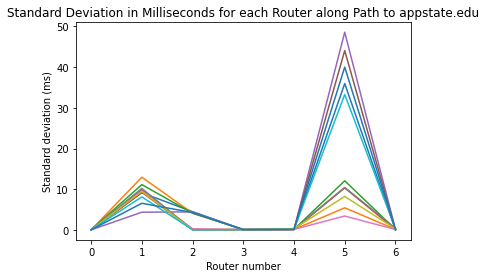

In [118]:
for i in app:
    plt.plot(list(range(i['mdev'].shape[0])), i['mdev'])
    
plt.title("Standard Deviation in Milliseconds for each Router along Path to appstate.edu")    
plt.xlabel("Router number")
plt.ylabel("Standard deviation (ms)")

### Observations from the above graph:
#### STD in Milliseconds for each Router along Path to appstate.edu
- At All 6 time points the std to get to the 0th, 3rd, 4th and 6th router is the same
- The routers with the most variation in average delay based on time is router #1 and #5
- Router #2, experiences some variation in std
- these observations align with the same patterns of average delay we observed in the first graph

#### Conclusion: 
- Because the standard deviations of the delay vary at the same times that the average and max delay increase for routers 1 and 5, we might assume that during high traffic times the speed at which a packet is transmitted is much more variable than at lower traffic times

#### Interesting notes:
- each colored line represents a ping trial done at a specific time of the day (we will later show analysis based on time of day). 
    - Upon quick inspection, notice the purple line at router 1 and router 5. At router 1 there was the least std and at router 5 it was the highest std. 
    - Now notice, the orange line, at route 1 it has the highest std, and router 5 it has the second lowest std. 
    - It is interesting to note that the std of router 1 and 5 seem to vary inversly with one another (similar to average delay)

### There was no loss of packets during any of the ping trails to App State.

## Now we compare ping trial performace at different time periods
- for sake of simplicity (since all ping trials expereiences 0 packet loss) we will use only 1 ping trail from each time period (even if we have multiple ping trial data)

In [119]:
app = [app_1_1,
       app_2_1,
       app_3_1,
       app_4_1,
      app_5_1]

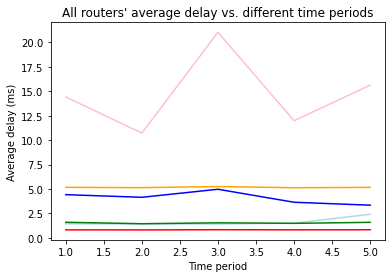

In [120]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['avg'][i])
    plt.plot([1,2,3,4,5], delay, c=colors[i])
    plt.title("All routers' average delay vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("Average delay (ms)")

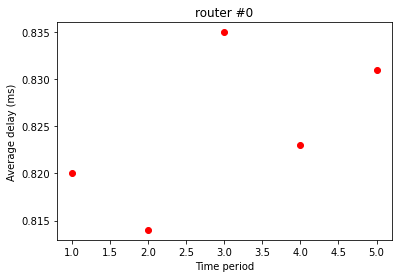

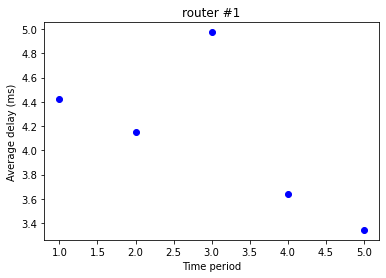

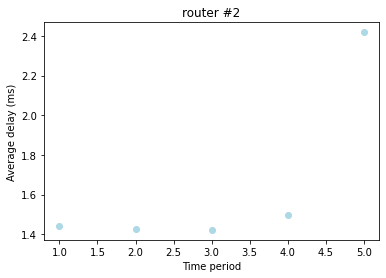

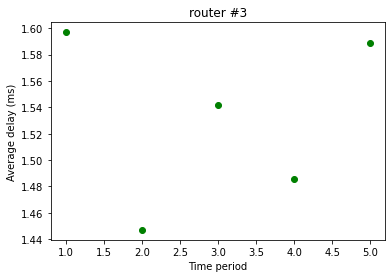

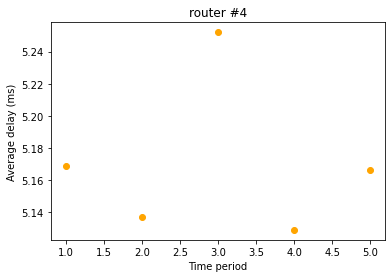

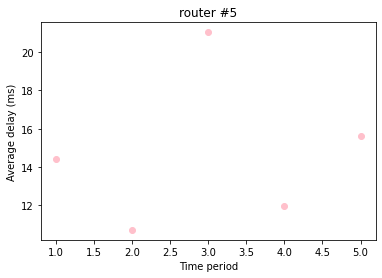

In [121]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['avg'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("Average delay (ms)")
    plt.show()

### The above graph's look at each router's average delay during each of the 5 time periods
- we can see that they each have different behavior which is likely indicative that they each handle volumes of loads of data at different times of the day 
- verbal analysis

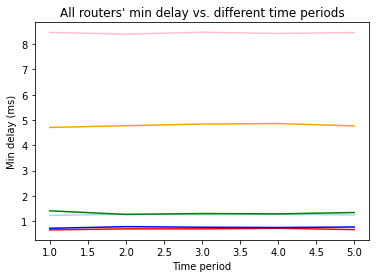

In [122]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['min'][i])
    plt.plot([1,2,3,4,5], delay, c=colors[i])
    plt.title("All routers' min delay vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("Min delay (ms)")

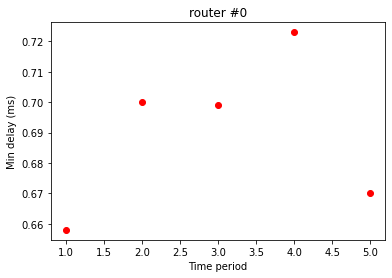

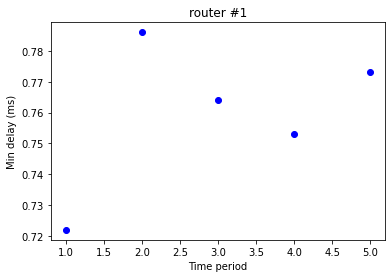

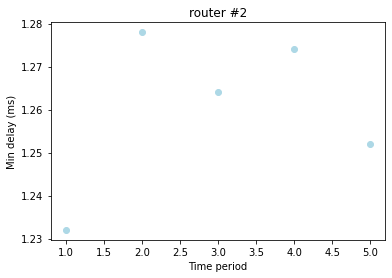

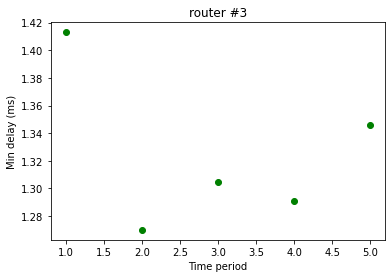

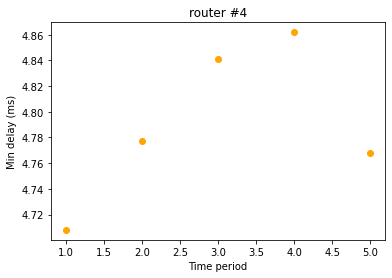

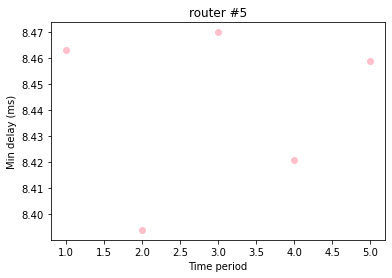

In [123]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['min'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("Min delay (ms)")
    plt.show()

### The above graph's look at each router's min delay during each of the 5 time periods 
- verbal analysis

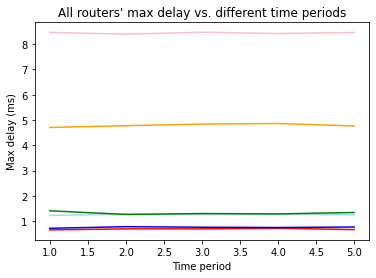

In [124]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['min'][i])
    plt.plot([1,2,3,4,5], delay, c=colors[i])
    plt.title("All routers' max delay vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("Max delay (ms)")

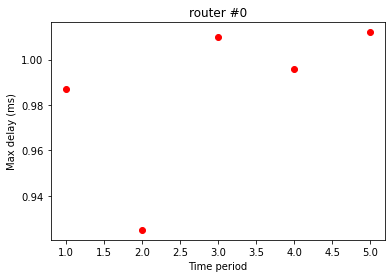

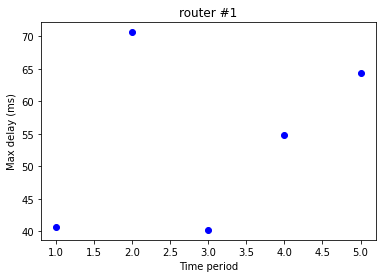

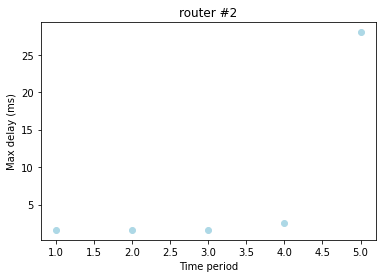

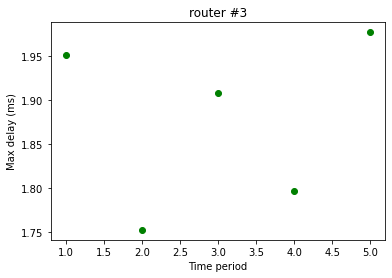

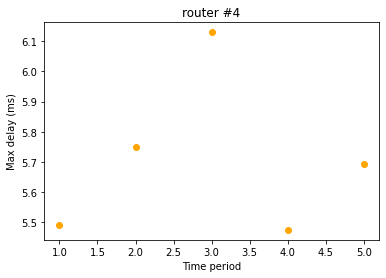

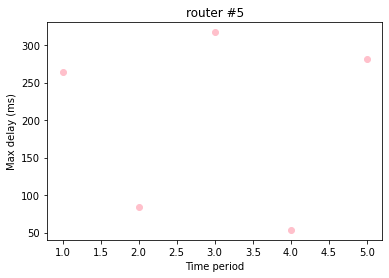

In [125]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['max'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("Max delay (ms)")
    plt.show()

### The above graph's look at each router's max delay during each of the 5 time periods 
- verbal analysis

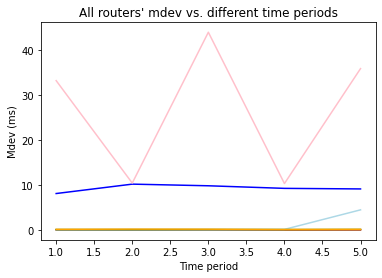

In [126]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['mdev'][i])
    plt.plot([1,2,3,4,5], delay, c=colors[i])
    plt.title("All routers' mdev vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("Mdev (ms)")

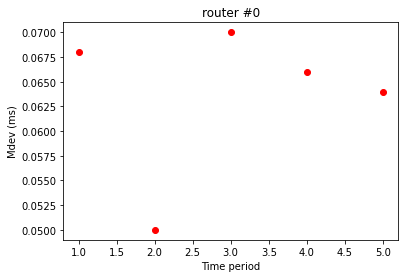

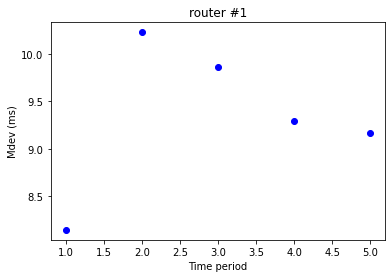

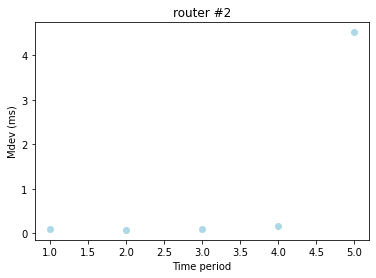

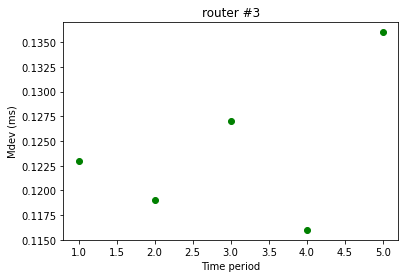

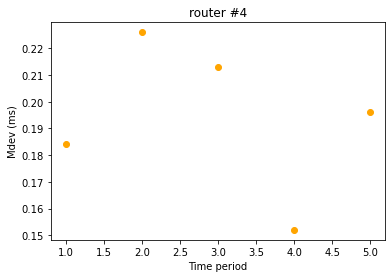

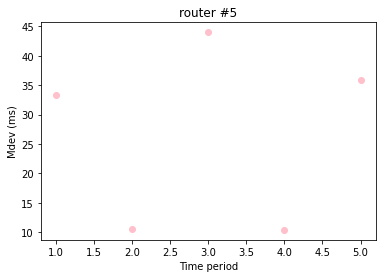

In [127]:
colors = ['red','blue','lightblue','green','orange','pink']
for i in range(6):
    delay = []
    for a in app:
        title = "router #"+str(i)
        delay.append(a['mdev'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("Mdev (ms)")
    plt.show()

### The above graph's look at each router's standard deviation during each of the 5 time periods 
- verbal analysis

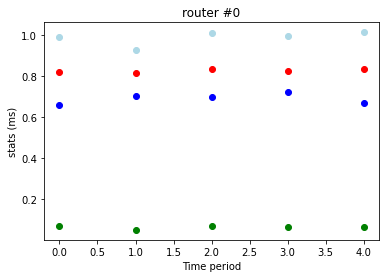

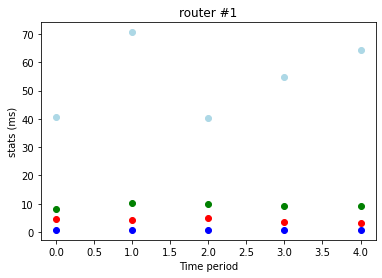

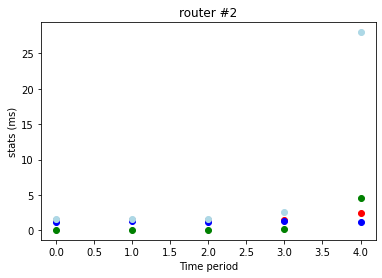

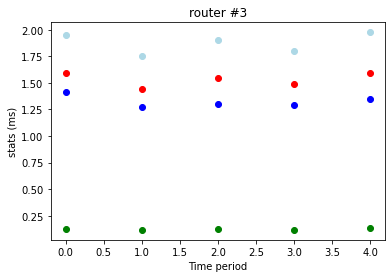

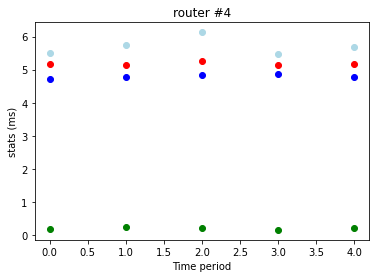

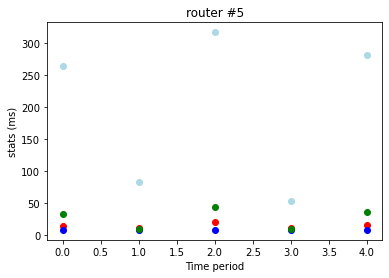

In [128]:
##ATTEMP THAT PROBABLY NEEDS TO BE DELETED

colors = ['red','blue','lightblue','green']
categories = ['avg','min','max','mdev']
for i in range(6):
    for a in range(len(app)):
        title = "router #"+str(i)
        
        for c in range(len(categories)):
            delay = []
            delay.append(app[a][categories[c]][i])
            plt.scatter([a], delay, c=colors[c])
    
    #plt.scatter([1,2,3,4,5], delay, c=colors[c])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("stats (ms)")
    plt.show()  

## Encoding for the above graph
- RED = avg
- BLUE = min
- LIGHT BLUE = max
- GREEN = mdev

# Oxford

In [129]:
ox_5_1 = pd.read_csv("ox.ac.uk_2021-03-16 00_02_51.130918_5.csv")
ox_5_2 = pd.read_csv("ox.ac.uk_2021-03-16 00_03_50.957986_5.csv")
ox_5_3 = pd.read_csv("ox.ac.uk_2021-03-16 00_17_45.539372_5.csv")

ox_1_1 = pd.read_csv("ox.ac.uk_2021-03-16 08_02_45.986879_1.csv")
ox_1_2 = pd.read_csv("ox.ac.uk_2021-03-16 08_17_46.945864_1.csv")

ox_2_1 = pd.read_csv("ox.ac.uk_2021-03-16 11_02_51.744047_2.csv")
ox_2_2 = pd.read_csv("ox.ac.uk_2021-03-16 11_17_50.399644_2.csv")

ox_3_1 = pd.read_csv("ox.ac.uk_2021-03-16 14_32_46.185434_3.csv")
ox_3_2 = pd.read_csv("ox.ac.uk_2021-03-16 14_47_46.370789_3.csv")

ox_4_1 = pd.read_csv("ox.ac.uk_2021-03-16 19_02_51.580594_4.csv")
ox_4_2 = pd.read_csv("ox.ac.uk_2021-03-16 19_17_50.806258_4.csv")

ox = [ox_5_1, ox_5_2, ox_5_3, 
       ox_4_1, ox_4_2,
      ox_3_1, ox_3_2,
      ox_2_1, ox_2_2,
      ox_1_1, ox_1_2]

All of the ping trial information can be viewed by printing out the contents of each dataframe.

#### Interesting note: for App state each ping trial went thru the exact same sequence of routers every single time

In [130]:
for i in ox:
    print(i)

               ip  received     min     avg     max    mdev
0    152.19.160.1        60   0.678   0.832   0.951   0.075
1   152.19.253.53        60   0.740   4.872  39.687   8.636
2   152.19.253.90        60   1.170   1.389   1.665   0.121
3   152.19.255.65        60   1.212   1.529   1.934   0.128
4   128.109.19.89        60   4.768   5.168   5.706   0.188
5   198.71.47.221        60   9.696  10.026  11.230   0.326
6  162.252.70.121        60  10.596  11.218  13.297   0.733
7    64.57.29.131        60  11.253  15.512  80.395  11.330
               ip  received     min     avg     max    mdev
0    152.19.160.1        60   0.688   0.820   1.022   0.069
1   152.19.253.53        60   0.761   2.680  49.903   6.984
2   152.19.253.90        60   1.150   1.361   1.625   0.107
3   152.19.255.65        60   1.261   1.527   2.590   0.173
4   128.109.19.89        60   4.804   5.119   5.427   0.164
5   198.71.47.221        60   9.681  10.206  19.624   1.294
6  162.252.70.121        60  10.595  10.

## Each colored line represent a separate ping trial - first analysis compares different router performances
#### (each time period has 2 ping trial, night period has 3 ping trials)
- Below we do some general observations before delving into the variation in delays over the course of different time periods

Text(0, 0.5, 'Average Delay (ms)')

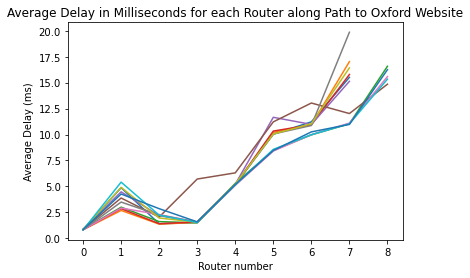

In [131]:
for i in ox:
    plt.plot(list(range(i['avg'].shape[0])), i['avg'])
    
plt.title("Average Delay in Milliseconds for each Router along Path to Oxford Website")    
plt.xlabel("Router number")
plt.ylabel("Average Delay (ms)")

Text(0, 0.5, 'Min Delay (ms)')

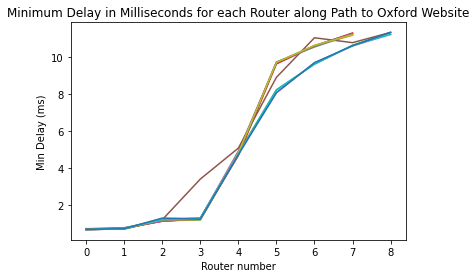

In [132]:
for i in ox:
    plt.plot(list(range(i['min'].shape[0])), i['min'])
    
plt.title("Minimum Delay in Milliseconds for each Router along Path to Oxford Website")    
plt.xlabel("Router number")
plt.ylabel("Min Delay (ms)")

Text(0, 0.5, 'Max Delay (ms)')

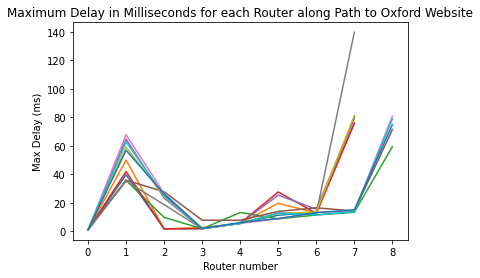

In [133]:
for i in ox:
    plt.plot(list(range(i['max'].shape[0])), i['max'])
    
plt.title("Maximum Delay in Milliseconds for each Router along Path to Oxford Website")    
plt.xlabel("Router number")
plt.ylabel("Max Delay (ms)")

Text(0, 0.5, 'Std (ms)')

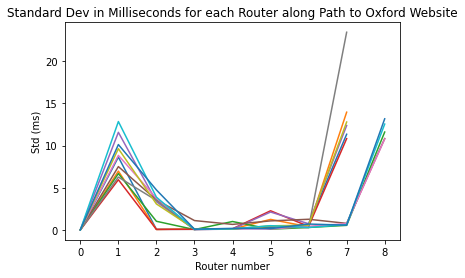

In [134]:
for i in ox:
    plt.plot(list(range(i['mdev'].shape[0])), i['mdev'])
    
plt.title("Standard Dev in Milliseconds for each Router along Path to Oxford Website")    
plt.xlabel("Router number")
plt.ylabel("Std (ms)")

### There was no loss of packets during any of the ping trails to App State.

## Now we compare ping trial performace at different time periods
- for sake of simplicity (since all ping trials expereiences 0 packet loss) we will use only 1 ping trail from each time period (even if we have multiple ping trial data)

In [135]:
for i in ox:
    if (i.shape[0] != 9):
        i.loc[len(i)] = 0

In [136]:
ox = [ox_1_1,
       ox_2_1,
       ox_3_1,
       ox_4_1,
      ox_5_1]

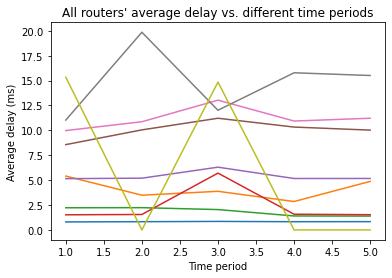

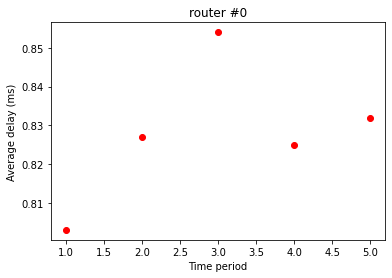

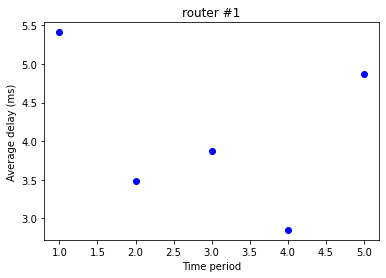

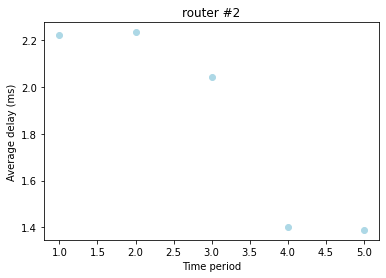

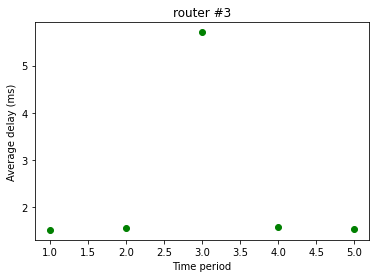

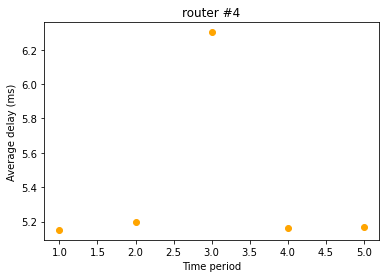

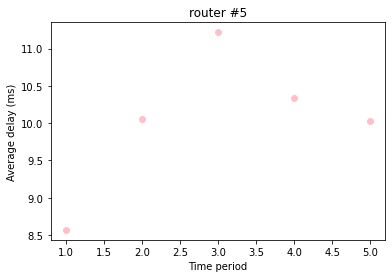

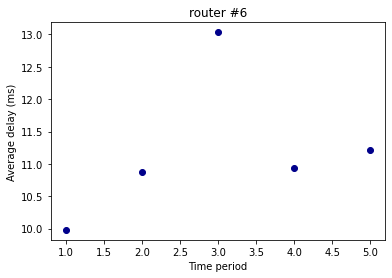

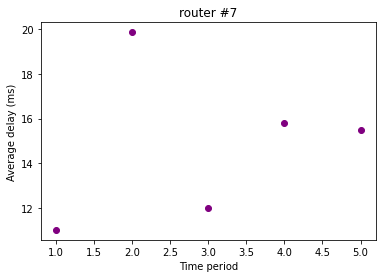

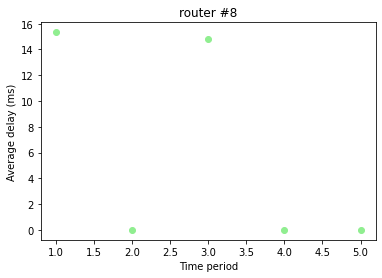

In [137]:
colors = ['red','blue','lightblue','green','orange','pink','darkblue','purple','lightgreen','yellow']

for i in range(9):
    delay = []
    for a in ox:
        title = a['ip'][i]
        delay.append(a['avg'][i])

    plt.plot([1,2,3,4,5], delay)
    plt.title("All routers' average delay vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("Average delay (ms)")
plt.show()

for i in range(9):
    delay = []
    for a in ox:
        title = "router #"+str(i)
        delay.append(a['avg'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("Average delay (ms)")
    plt.show()

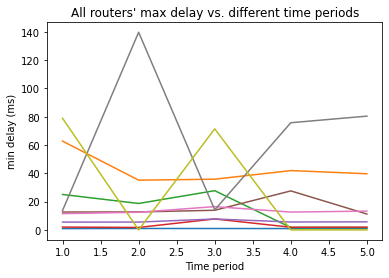

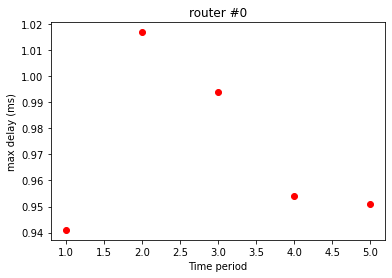

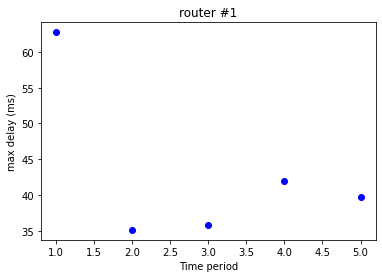

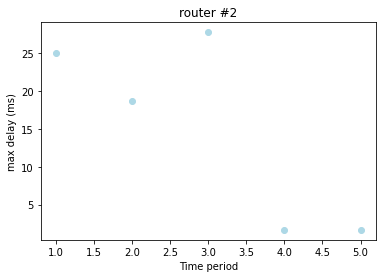

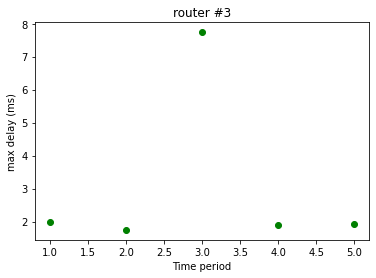

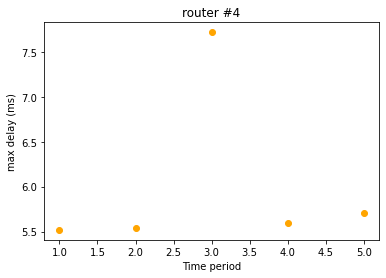

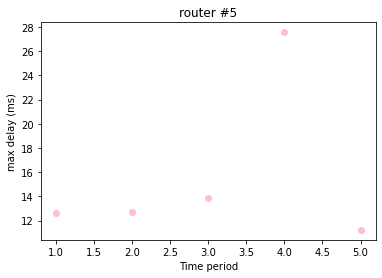

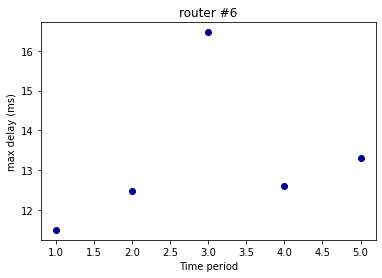

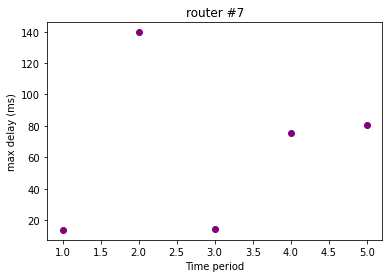

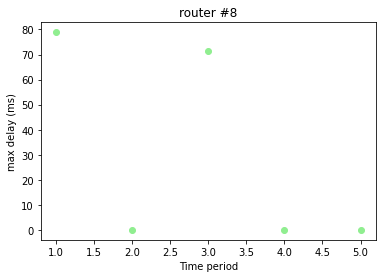

In [138]:
colors = ['red','blue','lightblue','green','orange','pink','darkblue','purple','lightgreen','yellow']

for i in range(9):
    delay = []
    for a in ox:
        
        delay.append(a['max'][i])

    plt.plot([1,2,3,4,5], delay)
    plt.title("All routers' max delay vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("min delay (ms)")
plt.show()

for i in range(9):
    delay = []
    for a in ox:
        title = "router #"+str(i)
        delay.append(a['max'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("max delay (ms)")
    plt.show()

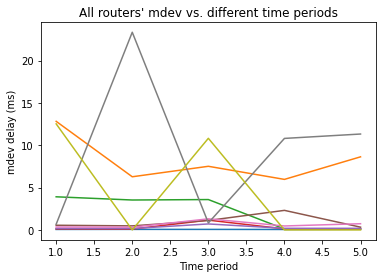

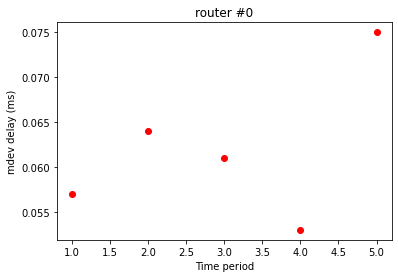

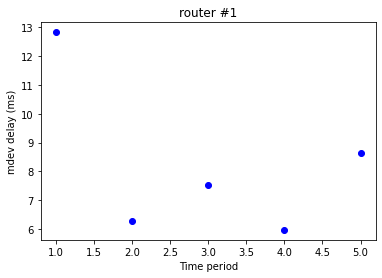

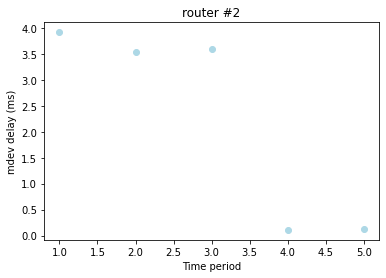

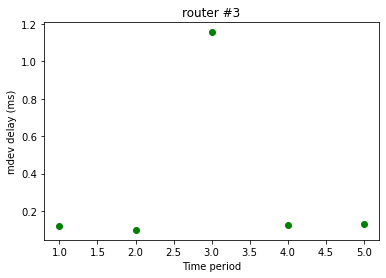

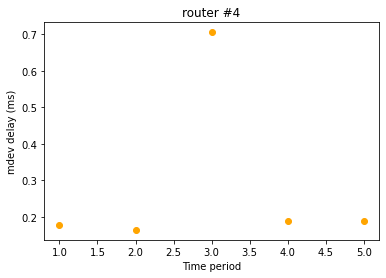

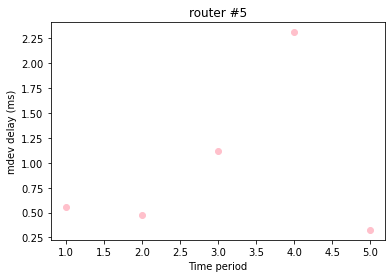

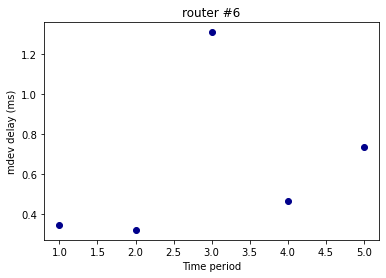

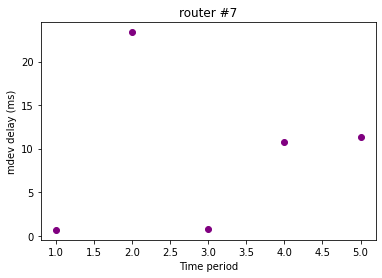

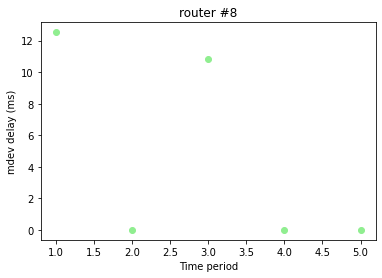

In [139]:
colors = ['red','blue','lightblue','green','orange','pink','darkblue','purple','lightgreen','yellow']

for i in range(9):
    delay = []
    for a in ox:
        delay.append(a['mdev'][i])
    plt.plot([1,2,3,4,5], delay)
    plt.title("All routers' mdev vs. different time periods")
    plt.xlabel("Time period")
    plt.ylabel("mdev delay (ms)")
plt.show()

for i in range(9):
    delay = []
    for a in ox:
        title = "router #"+str(i)
        delay.append(a['mdev'][i])
    plt.scatter([1,2,3,4,5], delay, c=colors[i])
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("mdev delay (ms)")
    plt.show()

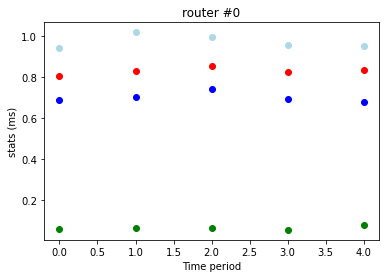

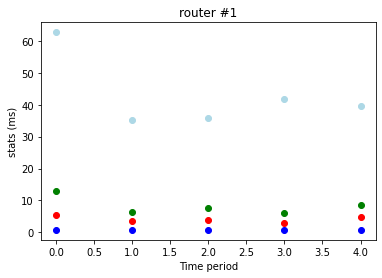

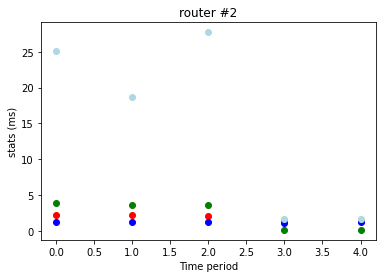

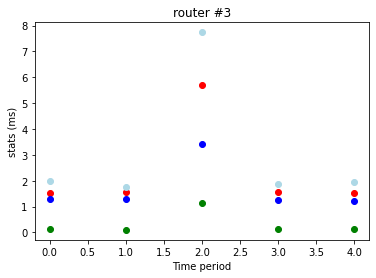

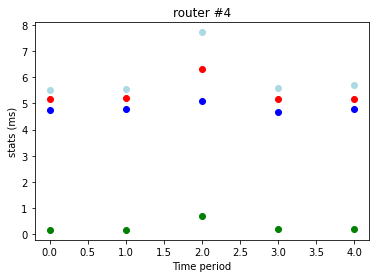

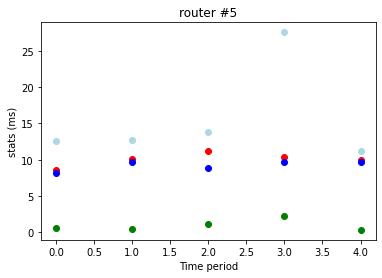

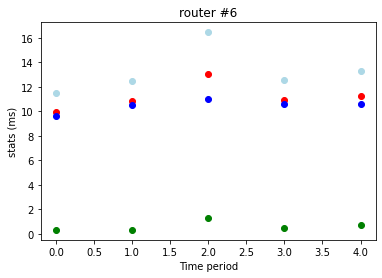

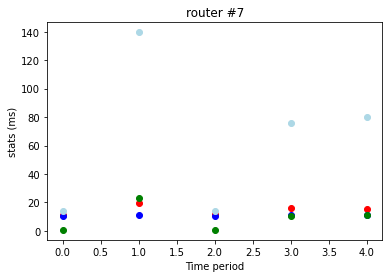

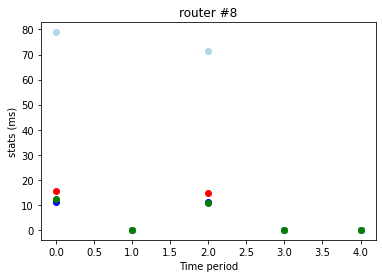

In [140]:
colors = ['red','blue','lightblue','green','orange','pink','darkblue','purple','lightgreen','yellow']
categories = ['avg','min','max','mdev']
for i in range(9):
    for a in range(len(ox)):
        title = ox[a]['ip'][i]
        
        for c in range(len(categories)):
            delay = []
            delay.append(ox[a][categories[c]][i])
            plt.scatter([a], delay, c=colors[c])
        
    #plt.scatter([1,2,3,4,5], delay, c=colors[c])
    title = "router #"+str(i)
    plt.title(title)
    plt.xlabel("Time period")
    plt.ylabel("stats (ms)")
    plt.show()
    

## Encoding for the above graph
- RED = avg
- BLUE = min
- LIGHT BLUE = max
- GREEN = mdev